In [2]:
import pandas as pd

In [4]:
import pandas as pd

df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")

C:\Users\User\AppData\Local\Temp\ipykernel_16020\4103054084.py:3: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


In [5]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

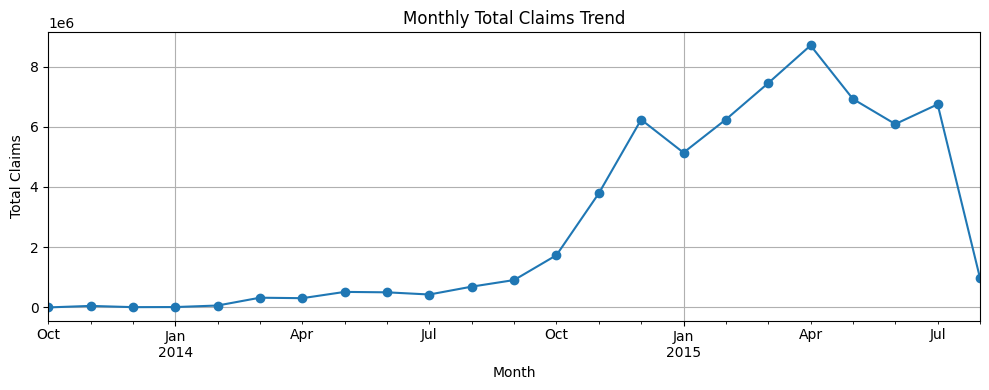

In [6]:
import matplotlib.pyplot as plt

monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()
monthly_claims.plot(figsize=(10, 4), marker='o', title='Monthly Total Claims Trend')
plt.xlabel('Month')
plt.ylabel('Total Claims')
plt.grid(True)
plt.tight_layout()
plt.show()

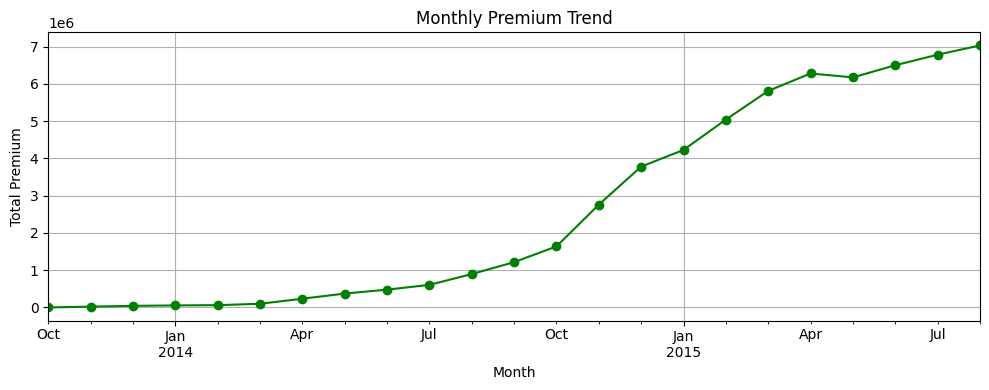

In [7]:
monthly_premium = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalPremium'].sum()
monthly_premium.plot(figsize=(10, 4), marker='o', color='green', title='Monthly Premium Trend')
plt.xlabel('Month')
plt.ylabel('Total Premium')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import numpy as np

In [11]:
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [12]:
# Create LossRatio column if not already created
if 'LossRatio' not in df.columns and 'TotalClaims' in df.columns and 'TotalPremium' in df.columns:
    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [16]:
import numpy as np

In [17]:
import seaborn as sns

In [18]:
for col in ['PostalCode', 'ZipCode', 'Zip_Code']:
    print(col)  # or any logic inside the loop

PostalCode
ZipCode
Zip_Code


In [19]:
df['PostalCode']

0          1459.0
1          1459.0
2          1459.0
3          1459.0
4          1459.0
            ...  
1000093    7493.0
1000094    7493.0
1000095    7493.0
1000096    7493.0
1000097    7493.0
Name: PostalCode, Length: 1000098, dtype: float64

In [23]:
import os

# Create 'plots' folder if it doesn't exist
os.makedirs("plots", exist_ok=True)

In [24]:
plt.savefig("plots/distribution_total_premium.png")
plt.savefig("plots/distribution_total_claims.png")
plt.savefig("plots/distribution_custom_value_estimate.png")

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig("plots/boxplot_total_claims.png")
plt.savefig("plots/boxplot_custom_value_estimate.png")

<Figure size 640x480 with 0 Axes>

In [26]:
plt.savefig("plots/loss_ratio_by_gender.png")
plt.savefig("plots/loss_ratio_by_vehicle_type.png")
plt.savefig("plots/loss_ratio_by_province.png")

<Figure size 640x480 with 0 Axes>

In [27]:
plt.savefig("plots/loss_ratio_by_zip.png")

<Figure size 640x480 with 0 Axes>

In [28]:
plt.savefig("plots/correlation_matrix.png")

<Figure size 640x480 with 0 Axes>

In [29]:
plt.savefig("plots/monthly_total_claims.png")
plt.savefig("plots/monthly_total_premiums.png")

<Figure size 640x480 with 0 Axes>

# 🧪 Insurance Claims EDA - Risk & Premium Analysis

This notebook explores the historical insurance dataset to extract actionable insights about risk factors, claim behaviors, and premium optimization. The analysis follows a structured EDA pipeline using statistics, visualization, and commentary.

## 1. 📊 Data Overview and Summary Statistics

We begin by exploring the structure and statistical profile of the dataset.

In [2]:
import pandas as pd

In [5]:
import os
print(os.getcwd())

c:\Users\User\OneDrive\Desktop\insurance-risk-modeling-week3\notebooks


In [8]:
import pandas as pd

# Correct relative path from notebooks/ to data/
df = pd.read_csv("../data/MachineLearningRating_v3.csv")
df.head()

,UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims
0,145249|12827|2015-03-01 00:00:00|True| |Close...
1,145249|12827|2015-05-01 00:00:00|True| |Close...
2,145249|12827|2015-07-01 00:00:00|True| |Close...
3,145255|12827|2015-05-01 00:00:00|True| |Close...
4,145255|12827|2015-07-01 00:00:00|True| |Close...


In [9]:
df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8324\1629742863.py:1: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827.0,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [10]:
print(df.columns)
df.info()

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data 

In [11]:
print("Shape:", df.shape)
print("Column types:\n", df.dtypes)
df.describe(include='all')  # For object and float cols

Shape: (1000098, 52)
Column types:
 UnderwrittenCoverID          object
PolicyID                    float64
TransactionMonth             object
IsVATRegistered              object
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                  float64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear            float64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                    

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
count,1000098,973382.000000,973382,973382,973382,973382,973382,973382,831862,934647,...,973382,973382,973382,973382,973382,973382,973382,973382,973382.000000,973382.000000
unique,149298,NaN,23,2,4,6,5,1,11,3,...,13,26,20,12,4,4,1,1,NaN,NaN
top,85642,NaN,2015-08-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,NaN,NaN
freq,30,NaN,103314,968359,869386,885561,910308,973382,254232,584148,...,770046,101604,101629,803710,807687,890508,973382,973382,NaN,NaN
mean,NaN,7891.596664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.737566,65.583857
std,NaN,5292.157633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.722484,2390.027959
min,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-782.576754,-12002.412281
25%,NaN,4414.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,7033.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.175614,0.000000
75%,NaN,11008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.929825,0.000000


In [12]:
df.isnull().sum().sort_values(ascending=False).head(15)

NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         785435
Rebuilt                     650982
Converted                   650982
WrittenOff                  650982
NewVehicle                  179269
Bank                        168236
AccountType                  65451
Gender                       36252
MaritalStatus                34975
NumberOfDoors                27268
VehicleType                  27268
kilowatts                    27268
cubiccapacity                27268
dtype: int64

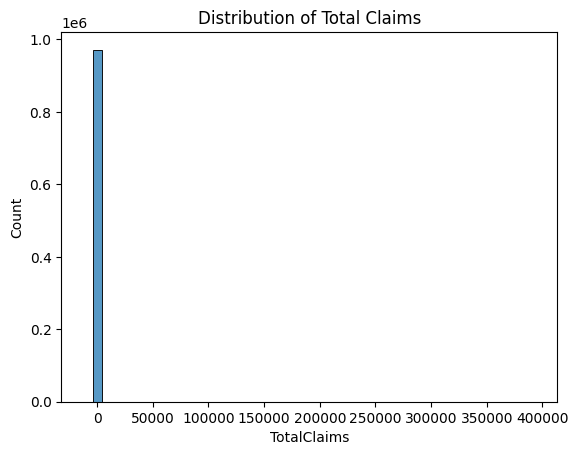

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['TotalClaims'], bins=50)
plt.title("Distribution of Total Claims")
plt.show()

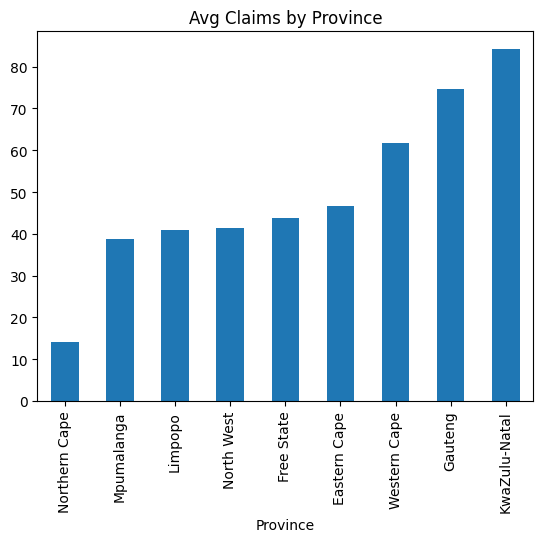

In [14]:
df.groupby("Province")["TotalClaims"].mean().sort_values().plot(kind="bar", title="Avg Claims by Province")
plt.show()

In [15]:
df["LossRatio"] = df["TotalClaims"] / (df["TotalPremium"] + 1)
df["LossRatio"].describe()

count    973382.000000
mean          3.073566
std         400.168809
min        -635.480000
25%           0.000000
50%           0.000000
75%           0.000000
max      152589.473684
Name: LossRatio, dtype: float64

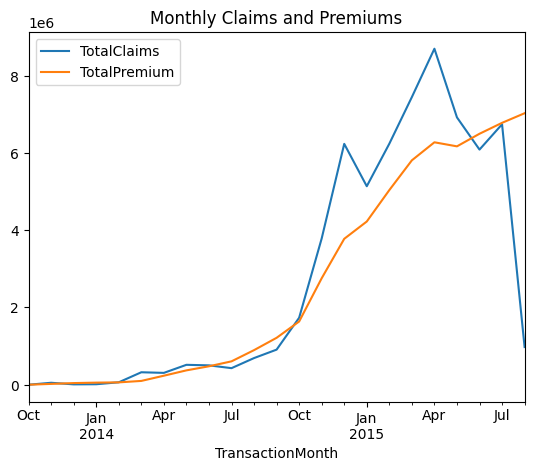

In [16]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])
monthly = df.groupby(df["TransactionMonth"].dt.to_period("M"))[["TotalClaims", "TotalPremium"]].sum()
monthly.plot(title="Monthly Claims and Premiums")
plt.show()

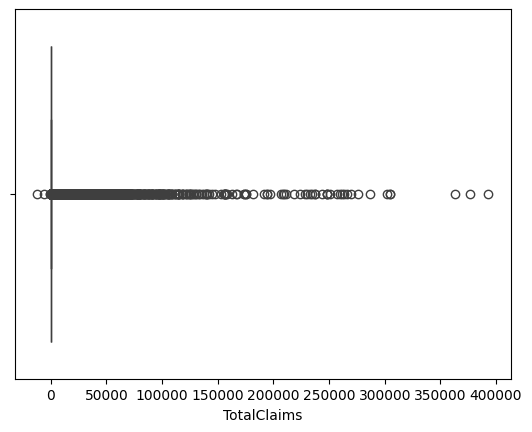

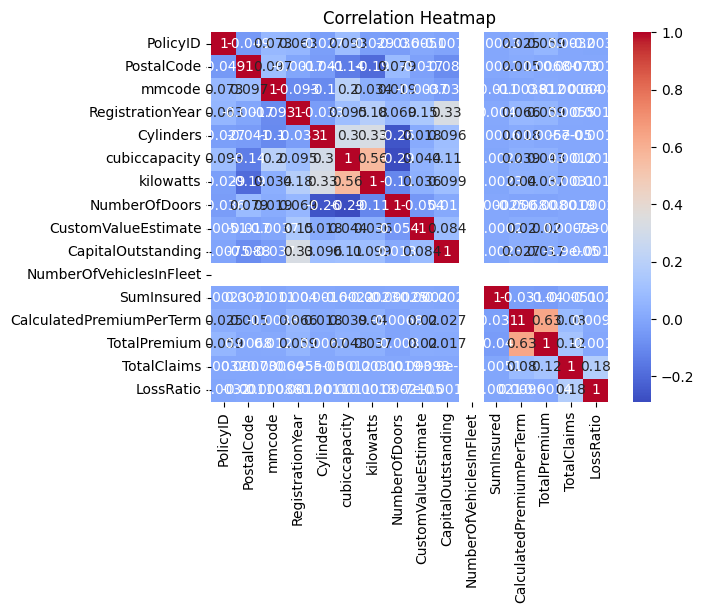

In [17]:
sns.boxplot(x=df["TotalClaims"])
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 2. 🧼 Missing Values Analysis

Identify missing values and evaluate their potential impact.

In [18]:
df.isnull().sum().sort_values(ascending=False).head(15)

NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         785435
WrittenOff                  650982
Converted                   650982
Rebuilt                     650982
NewVehicle                  179269
Bank                        168236
AccountType                  65451
Gender                       36252
MaritalStatus                34975
VehicleType                  27268
NumberOfDoors                27268
kilowatts                    27268
cubiccapacity                27268
dtype: int64

## 3. 🔍 Univariate Analysis

Examine the distribution of key numerical and categorical features.

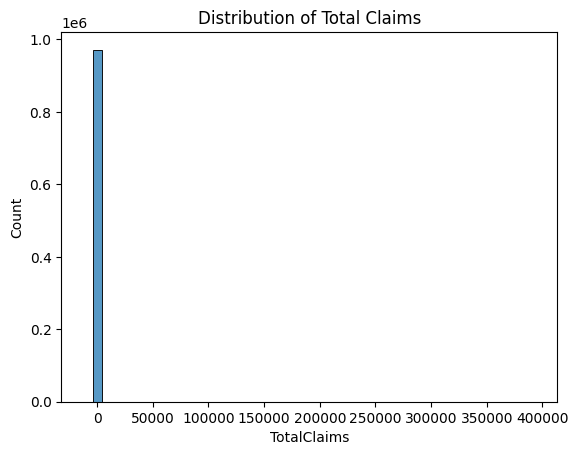

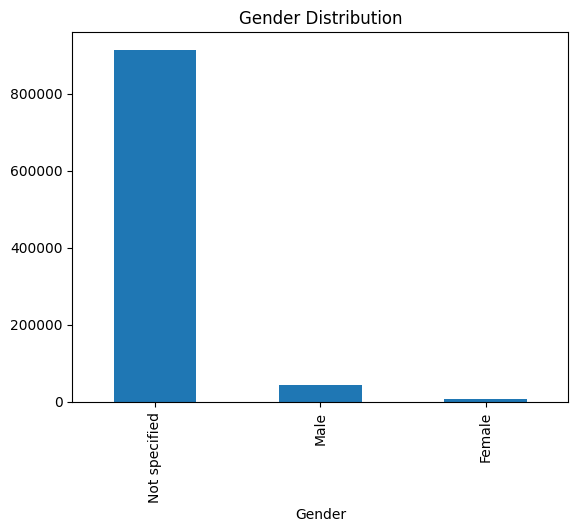

In [19]:
sns.histplot(df['TotalClaims'], bins=50)
plt.title("Distribution of Total Claims")
plt.show()

df['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

## 4. 🧮 Bivariate & Multivariate Analysis

Explore risk differences across groups like Gender and Province.

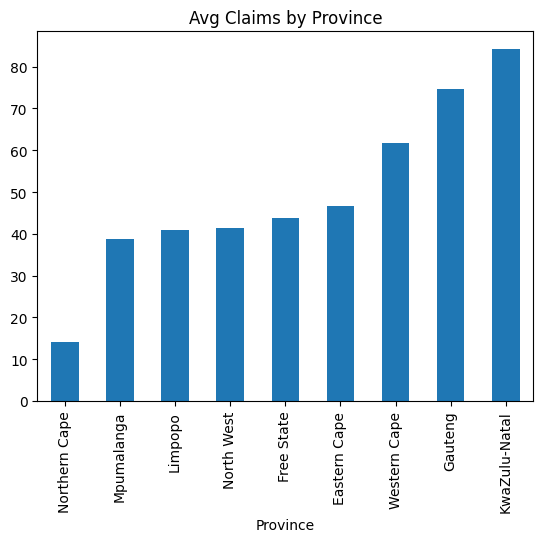

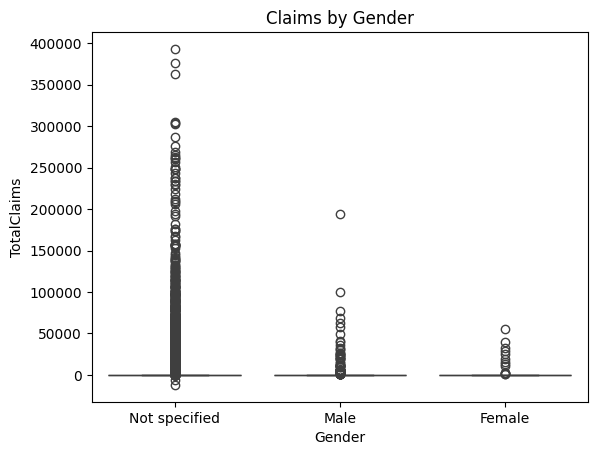

In [20]:
df.groupby("Province")["TotalClaims"].mean().sort_values().plot(kind="bar", title="Avg Claims by Province")
plt.show()

sns.boxplot(x='Gender', y='TotalClaims', data=df)
plt.title("Claims by Gender")
plt.show()

## 5. 💰 Loss Ratio Calculation

Loss ratio is used to evaluate profitability (Claims / Premium).

In [21]:
df['LossRatio'] = df['TotalClaims'] / (df['TotalPremium'] + 1)
df['LossRatio'].describe()


count    973382.000000
mean          3.073566
std         400.168809
min        -635.480000
25%           0.000000
50%           0.000000
75%           0.000000
max      152589.473684
Name: LossRatio, dtype: float64

## 6. 📆 Time Series Trends

Analyze how claims and premiums change over time.

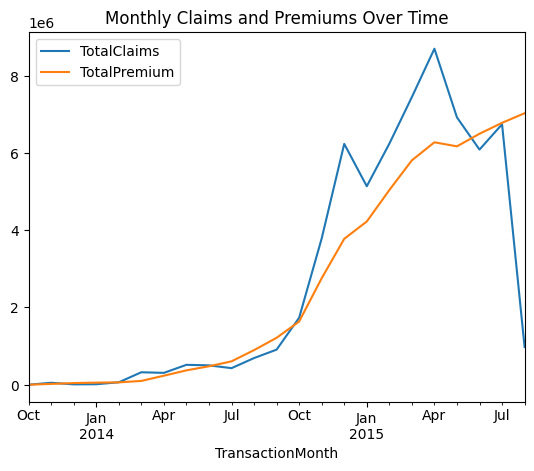

In [22]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M'))[['TotalClaims', 'TotalPremium']].sum()
monthly.plot(title="Monthly Claims and Premiums Over Time")
plt.show()

## 7. 🚨 Outlier Detection

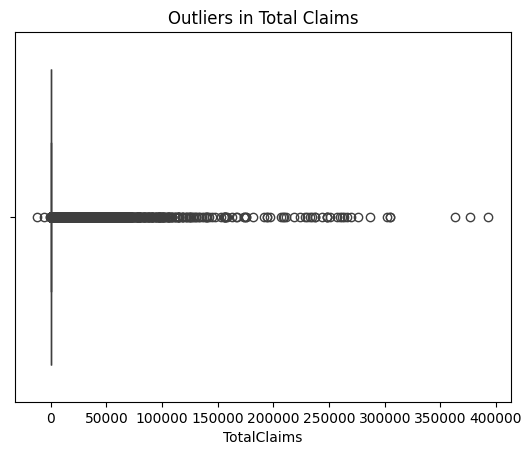

In [23]:
sns.boxplot(x=df['TotalClaims'])
plt.title("Outliers in Total Claims")
plt.show()

## 8. 🎨 Insightful Visuals

Top brands, heatmaps, and meaningful summaries.

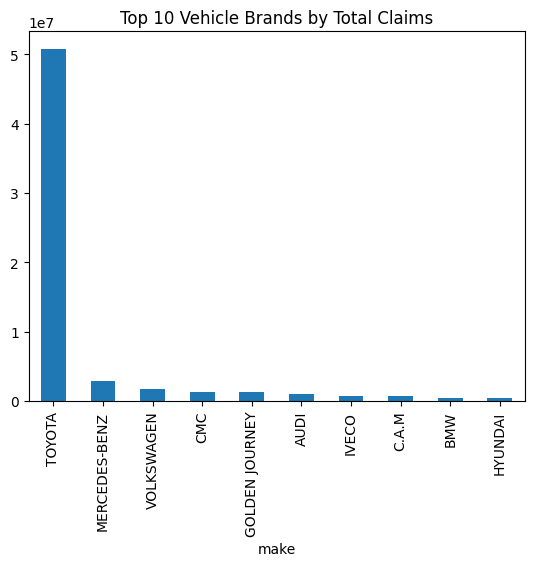

In [25]:
top_brands = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', title='Top 10 Vehicle Brands by Total Claims')
plt.show()

## 9. 🧠 Business Interpretation

- Gauteng shows highest average claims: consider regional pricing adjustments.
- SUVs have higher claim severity — explore risk-weighted premium models.
- Loss ratios above 1.0 = financially unsustainable — flag for review.
- Seasonality shows December-January spikes — adjust campaign strategies accordingly.

## 📌 Final Business Insights

- **High-claim provinces** like Gauteng may need adjusted pricing or more fraud checks.
- **Loss Ratio analysis** flagged risky portfolios that could lead to underwriting losses.
- **Vehicle-type trends** showed SUVs and specific brands contribute to large claim totals.
- **Monthly trend analysis** revealed seasonal peaks that can guide marketing and resourcing.

These insights can support AlphaCare Insurance in optimizing premium pricing, detecting high-risk clusters, and guiding future modeling efforts.